In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Header image plot

In [45]:
wknd_data = pd.read_csv("/Users/rachelforbes/Desktop/collingwood_wknd_weather.csv")
wknd_data.set_index('Time', inplace=True)
wknd_data.head()

,Station Name,Year,Month,Day,Temp,DewPointTemp,PercRelHum,Precip_mm,WindDir,WindSpd,kPa
Time,,,,,,,,,,,
0:00,COLLINGWOOD,2020,12,2,-0.6,-1.6,93,0.0,35,47,98.34
1:00,COLLINGWOOD,2020,12,2,-0.7,-1.3,95,0.0,34,46,98.41
2:00,COLLINGWOOD,2020,12,2,-0.5,-1.3,94,0.2,34,50,98.47
3:00,COLLINGWOOD,2020,12,2,-0.4,-1.6,91,0.0,34,48,98.54
4:00,COLLINGWOOD,2020,12,2,-0.4,-1.6,91,0.0,34,51,98.58


In [46]:
wknd_data['WindSpd_inv'] = -1 * wknd_data.WindSpd # inverse only used because the format better fits the header

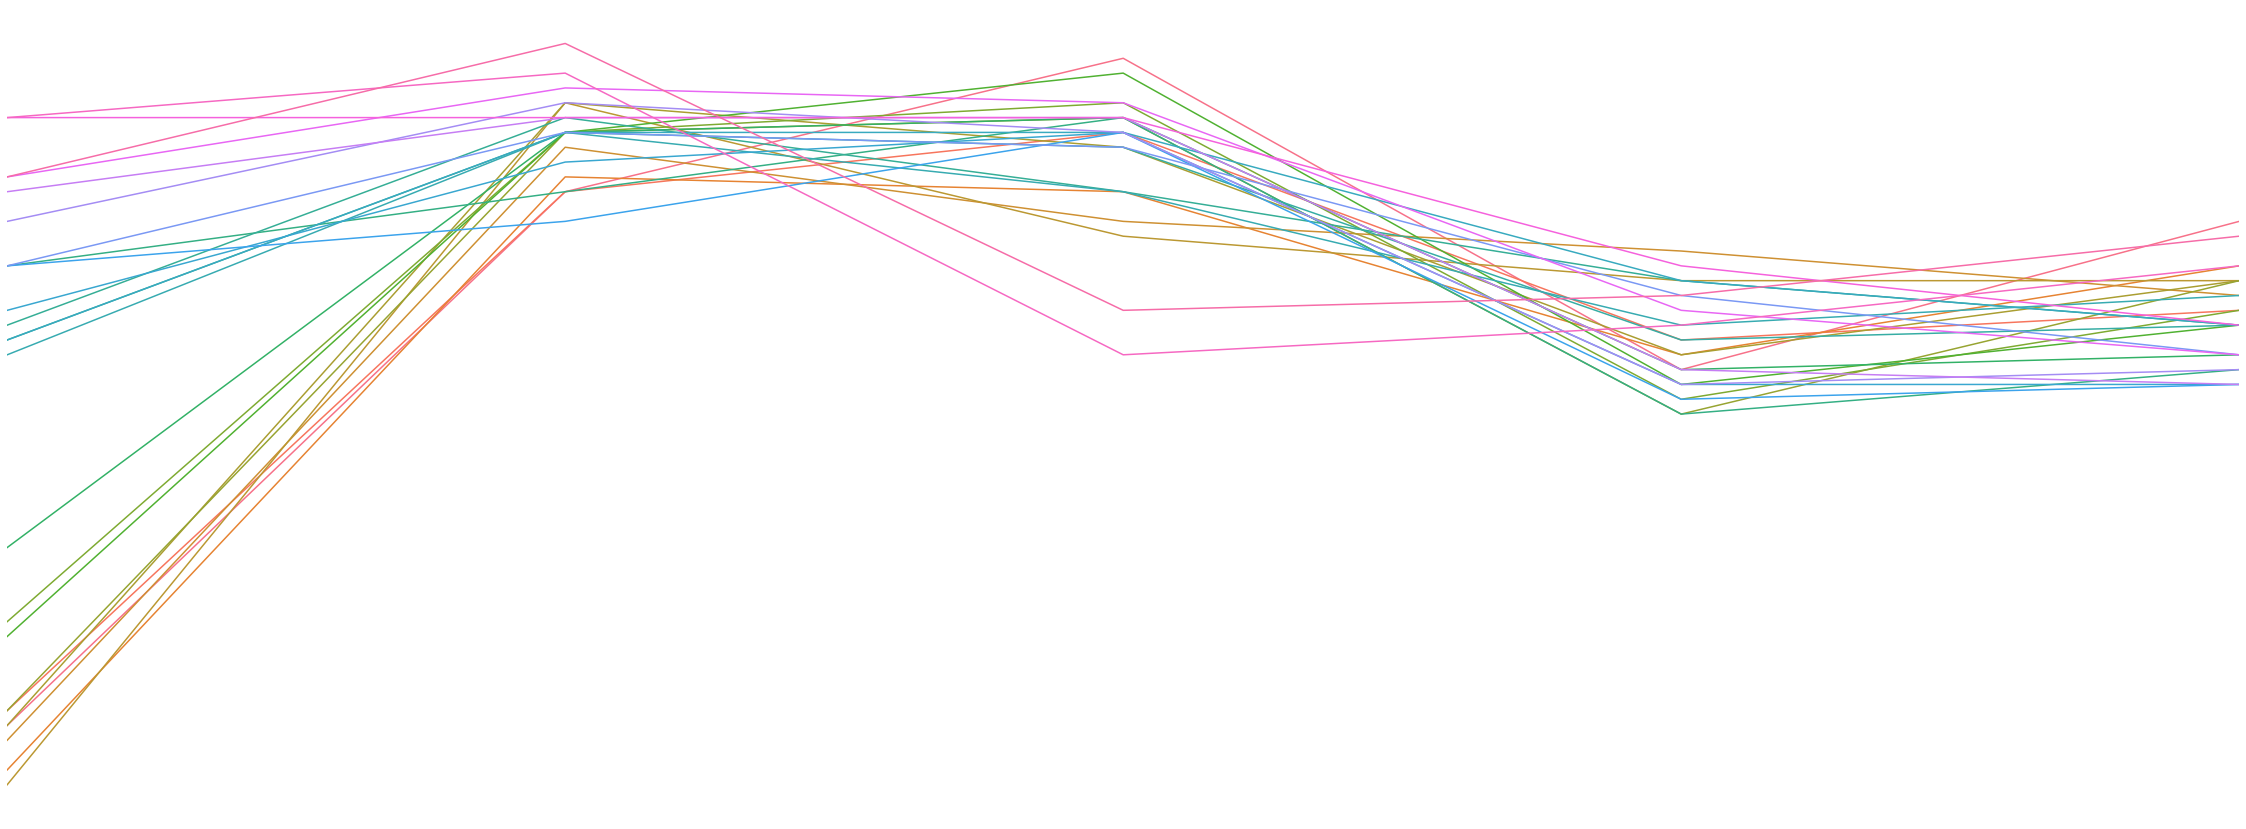

In [86]:
sns.set_palette("Pastel1")

# Initialize the figure
plt.figure(figsize=(40,15))

# Plot the data
sns.lineplot(x = wknd_data.Day, y = wknd_data.WindSpd_inv, hue = wknd_data.index, linewidth = 1.5, legend = None)

# Remove axes
plt.axis('off')

# Change x lim to start at Dec 2 (first date of trip)
plt.xlim(2.0, 6.0)

# Save fig
plt.savefig('windspd.png', dpi=300)

# Logo plot

In [43]:
# This plot is a circular barplot of the temperature on my wedding day
day_data = pd.read_csv("/Users/rachelforbes/Desktop/collingwood_weather.csv")
day_data.set_index('Time', inplace=True)
day_data.head()

,Station Name,Year,Month,Day,Temp,DewPointTemp,PercRelHum,Precip_mm,WindDir,WindSpd,kPa
Time,,,,,,,,,,,
0:00,COLLINGWOOD,2020,12,4,3.0,-0.5,78,0.0,18,2,98.85
1:00,COLLINGWOOD,2020,12,4,3.2,-0.2,78,0.0,22,7,98.81
2:00,COLLINGWOOD,2020,12,4,3.2,-0.8,75,0.0,24,11,98.81
3:00,COLLINGWOOD,2020,12,4,3.2,-1.2,73,0.0,20,13,98.80
4:00,COLLINGWOOD,2020,12,4,3.0,-1.0,75,0.0,22,14,98.73


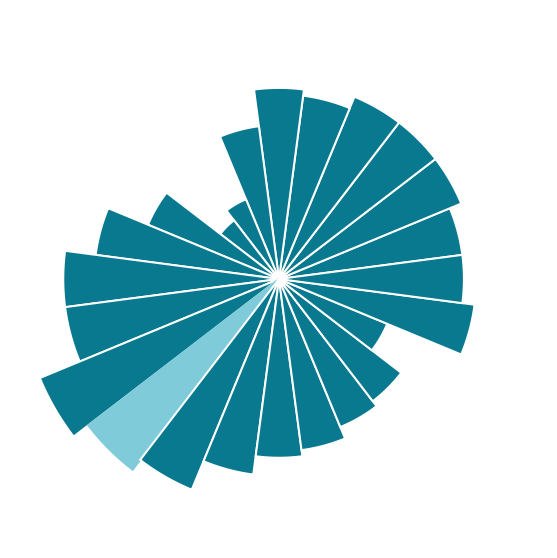

In [68]:
import matplotlib.cm as cm

# Initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Input plot layot parameters
upperLimit = 6
lowerLimit = 0

# Compute max Temp value
max = day_data['Temp'].max()

# Compute height of bars
slope = (max - lowerLimit) / max
heights = slope * day_data.Temp + lowerLimit

# Compute the width bars
width = 2*np.pi / len(day_data.index)

# Compute the angle each bar is centered on
indexes = list(range(1, len(day_data.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color= "#09798f"
)

# Change bar colour at 14:00 (time of ceremony)
bars[14].set_color('#80CBDA')

# Save fig
plt.savefig('temperatures.png', dpi=300)

# Labels are not included, though code is outlined below for reference

### Add labels
for bar, angle, height, label in zip(bars,angles, heights, day_data["Temp"]):

    # Labels are rotated (in degrees)
    rotation = np.rad2deg(angle)

    # Flip some labels
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
        
    # Draw labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 